In [166]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
import numpy as np
import pandas as pd

In [137]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [138]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [139]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [140]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [141]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [142]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [143]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [144]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x17ab3b4b940>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [145]:
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [146]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x17ab229c320>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0}

In [147]:
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [148]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [149]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# what is the most recent date in the file
date_to = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(date_to)

('2017-08-23',)


In [150]:
# Calculate the date 1 year ago from the last data point in the database

date_start = dt.date(2017,8,23) - dt.timedelta(days=364)
print(date_start)

2016-08-24


In [151]:
# Perform a query to retrieve the data and precipitation scores
past_year = session.query(Measurement.date, Measurement.prcp, Measurement.station).filter(Measurement.date >= date_start)

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df=pd.DataFrame(past_year, columns = ['Date','Precipitation','Station'])
prcp_df

,Date,Precipitation,Station
0,2016-08-24,0.08,USC00519397
1,2016-08-25,0.08,USC00519397
2,2016-08-26,0.00,USC00519397
3,2016-08-27,0.00,USC00519397
4,2016-08-28,0.01,USC00519397
...,...,...,...
2218,2017-08-19,0.09,USC00516128
2219,2017-08-20,NaN,USC00516128
2220,2017-08-21,0.56,USC00516128
2221,2017-08-22,0.50,USC00516128


In [152]:
# reset NaN columns to 0 or remove them?
df=prcp_df.isnull().sum()
print(df)


Date               0
Precipitation    208
Station            0
dtype: int64


In [153]:
#drop all rows where the prcp is null or NaN, on the presumption that it is NOT a legitimate reading
clean_prcp_df=prcp_df.dropna()
clean_prcp_df


,Date,Precipitation,Station
0,2016-08-24,0.08,USC00519397
1,2016-08-25,0.08,USC00519397
2,2016-08-26,0.00,USC00519397
3,2016-08-27,0.00,USC00519397
4,2016-08-28,0.01,USC00519397
...,...,...,...
2216,2017-08-17,0.13,USC00516128
2218,2017-08-19,0.09,USC00516128
2220,2017-08-21,0.56,USC00516128
2221,2017-08-22,0.50,USC00516128


In [154]:
# set the index to the date column
prcp_indexed_df=clean_prcp_df.set_index('Date')
prcp_indexed_df.dtypes
# Sort the dataframe by date
prcp_indexed_df.index
prcp_indexed_df.sort_index(inplace=True)
prcp_indexed_df

,Precipitation,Station
Date,,
2016-08-24,0.08,USC00519397
2016-08-24,1.22,USC00519523
2016-08-24,2.28,USC00514830
2016-08-24,1.45,USC00516128
2016-08-24,2.15,USC00513117
...,...,...
2017-08-22,0.50,USC00516128
2017-08-23,0.00,USC00519397
2017-08-23,0.08,USC00519523


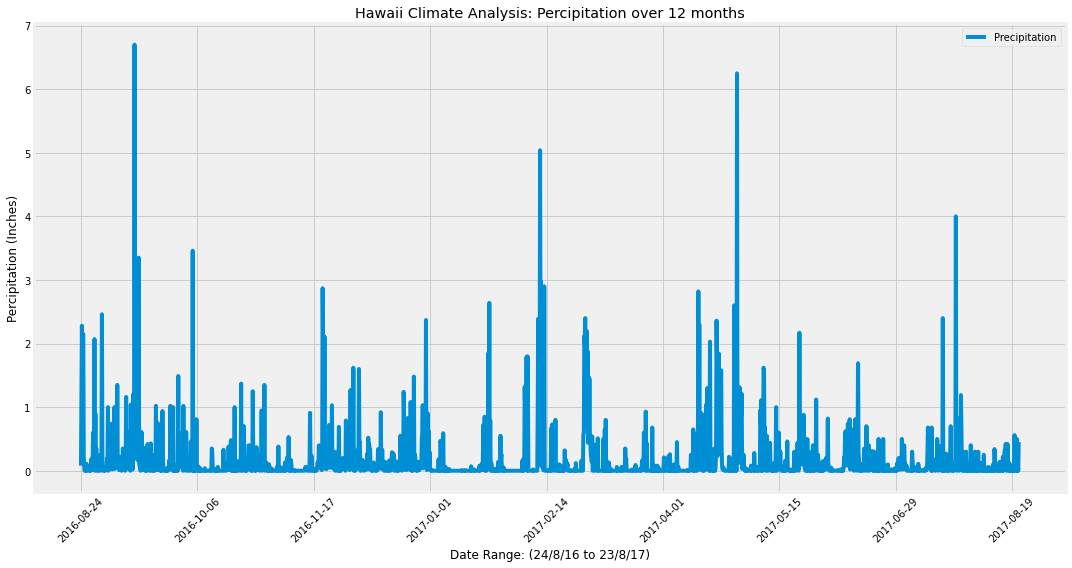

In [155]:
# Use Pandas Plotting with Matplotlib to plot the data
#Determine the plot size
prcp_indexed_df.plot(figsize=(15,8))
plt.grid(True)
plt.xticks(rotation='45')
plt.xlabel("Date Range: (24/8/16 to 23/8/17)")
plt.ylabel("Percipitation (Inches)")
plt.title("Hawaii Climate Analysis: Percipitation over 12 months")
plt.legend()
plt.tight_layout()

plt.show()



In [156]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_indexed_df.describe()


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [157]:
# From this point on, I was confused in the intrepretation of "in this dataset" 
# was it intented to mean 'in this dataset of 12 months only, with non value records removed'
# or was it intended to mean in the orginal dataset covering a number of years.
# quite unclear, but reading on, I have presumed it is the original dataset, 
# given the 'last 12 months' reference a few lines down

In [158]:
# Design a query to show how many stations are available in this dataset?
unique_stations=session.query(Measurement.station).distinct().count()

print(f'Stations available in this dataset: {unique_stations}')

Stations available in this dataset: 9


In [159]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_readings = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

station_readings

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [160]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#this instruction refers to temerature. when I look at the file, the only possible field to use
#is tobs. Think it means 'time of observation'. As the contents of the field 
#could easily be Farenhiet temperatures, and there are no other options in the dataset, I am
#presuming in this instances that tobs means temperature at time of observation

most_active_min = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281' ).all()
most_active_max = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281' ).all()
most_active_avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281' ).all()
print('In the most active station:')
print(f' the minumum tobs was: {most_active_max}')
print(f' the maximum was {most_active_min},')
print(f' and the average was {most_active_avg}')


In the most active station:
 the minumum tobs was: [(85.0,)]
 the maximum was [(54.0,)],
 and the average was [(71.66378066378067,)]


In [179]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
# and plot the results as a histogram

temp = session.query(Measurement.station,Measurement.tobs).filter(Measurement.date >= date_start)
temp_df=pd.DataFrame(temp, columns = ['station', 'tobs'])
temp_station_df= temp_df[(temp_df['station']=='USC00519281')]
top_station_df=temp_station_df.drop('station', 1)
top_station_df

,tobs
1524,77.0
1525,80.0
1526,80.0
1527,75.0
1528,73.0
...,...
1870,77.0
1871,77.0
1872,76.0
1873,76.0


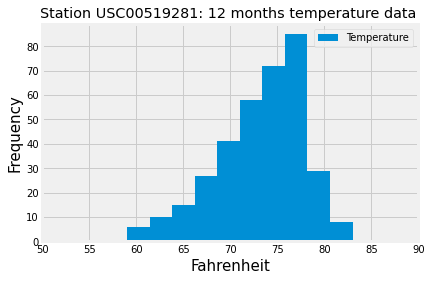

<Figure size 720x360 with 0 Axes>

In [198]:
top_station_df.hist()
plt.title("Station USC00519281: 12 months temperature data ")
plt.ylabel("Frequency",fontsize=15)
plt.xlabel("Fahrenheit",fontsize=15)
legend=["Temperature"]
plt.legend(legend)
plt.xlim([50.0,90.0])
plt.figure(figsize=[10,5])
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
